**iSSVD** is the algorithm developed for 'Robust Intergrative Biclustering for Multi-view Data'. It is based on sparse singular value decompostion (Lee et al. 2010) and stability selection (Meinshausen and Bühlmann, 2010 and Sill et al., 2011).

This is a simple guide to show how to use the python package 'iSSVD'.

In [36]:
import pandas as pd
import numpy as np
from issvd_functions import issvd, issvd_diagnostics, gen_sim_vec, gen_tmp
from numpy.random import seed

First generate example data. Here we generate one group of data that contains two views, each has dimension $200\times1,000$. We have four artificical biclusters in the data while each biclsuter contains $50$ samples and $100+100$ (100 for each view) variables. There is no overlaps between biclsuters. The noise level $\sigma$ is 0.1.

In [2]:
seed(20)
data, rows, cols = gen_sim_vec(n=200,p=1000,D=2,rowsize=50, colsize=100, 
                               numbers=1,sigma=0.1,nbicluster=4, orthonm=False)

df = data[0]

Then we run iSSVD.

In [5]:
res = issvd(X=df,standr=False,pointwise=True,steps=100,size=0.5,
            vthr = 0.9,ssthr=[0.6,0.65],nbicluster=10,rows_nc=False,cols_nc=False,col_overlap=False
            ,row_overlap=False,pceru=0.1,pcerv=0.1,merr=0.0001,iters=100)

Integrative Bicluster 1...


Integrative Bicluster 2...


Integrative Bicluster 3...


Integrative Bicluster 4...


Integrative Bicluster 5...
Rows not stable!
Integrative biclusters detected: 4

All samples are clustered!


We compare the biclusters with the original ones. The intermediate step is to convert the true biclsuter indices to the format identified by the diagnostic function.

In [10]:
# Bicluster samples identified by iSSVD
Rows = res['Sample_index']
# Bicluster variables identified by iSSVD
Cols = res['Variable_index']

# True bicluster samples and variables
row_ind = rows[0]
col_ind = cols[0]

res1tmp, res2tmp = gen_tmp(Rows,Cols, row_ind, col_ind,n=200,p=1000,D=2)

rev, rel, f, fp, fn = issvd_diagnostics(res1tmp,res2tmp,row_ind,col_ind)

In [14]:
print(f"Average Revovery is {rev.round(4)}.")

Average Revovery is 0.903.


In [15]:
print(f"Average Relevance is {rel.round(4)}.")

Average Relevance is 0.903.


In [16]:
print(f"F-score is {f.round(4)}.")

F-score is 0.903.


In [17]:
print(f"False positive rate is {fp.round(4)}.")

False positive rate is 0.0938.


In [18]:
print(f"False negative rate is {fn.round(4)}.")

False negative rate is 0.015.


Next, we visualize the biclusters.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

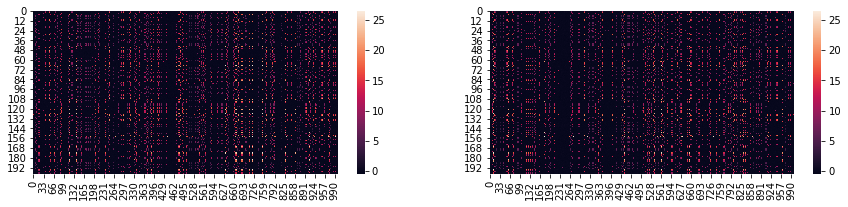

In [26]:
# Before clustered
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

sns.heatmap(df[0],ax=axes[0])
sns.heatmap(df[0],ax=axes[1])

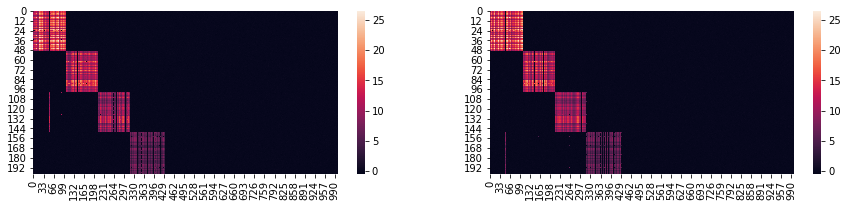

In [78]:
# After Clustered

new_df = []
for d in range(2):
    cs = []
    d=0
    col = np.array([],dtype=int)
    for i in range(4):
        r1 = df[d][Rows[i],:]
        col = np.append(col,Cols[i][d])
        c1 = r1[:,col]
        c2 = np.delete(r1, col, axis=1)
        c3 = np.concatenate([c1,c2], axis=1)
        cs.append(c3)
    new_df.append(np.vstack(cs))
    
fign, axesn = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
sns.heatmap(new_df[0],ax=axesn[0])
sns.heatmap(new_df[0],ax=axesn[1])

In [81]:
! jupyter nbconvert --to html Guide.ipynb

[NbConvertApp] Converting notebook Guide.ipynb to html
[NbConvertApp] Writing 613650 bytes to Guide.html
